# Symbolic Mathematics in Python with `SymPy`


<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/phonchi/nsysu-math106A/blob/master/static_files/presentations/13_SymPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/phonchi/nsysu-math106A/blob/master/static_files/presentations/13_SymPy.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

`SymPy` is a Python library designed for symbolic mathematics. Its goal is to serve as an alternative to systems like Mathematica, Maple, or Sage while maintaining a simple and easily extensible codebase. `SymPy` is written entirely in `Python` and does not necessitate any external libraries.

The standard way of importing the module is:

In [1]:
package_name = "sympy"

try:
    __import__(package_name)
    print(f"{package_name} is already installed.")
except ImportError:
    print(f"{package_name} not found. Installing...")
    %pip install {package_name}

sympy is already installed.


In [2]:
import sympy as sp

## Using `SymPy` as a calculator

The core module in the `SymPy` package includes the `Number` class, which represents atomic numbers. This class has two subclasses: the `Float` and `Rational` classes. The `Rational` class is further extended by the `Integer` class. First, let's create an Integer object from `SymPy` and perform some calculations:

In [3]:
u = sp.Integer(24)
u/8, u/7

(3, 24/7)

As demonstrated, if an exact result can be obtained, `SymPy` will return it. If not, `SymPy` will provide an expression instead.

The `Rational` class represents a rational number as a pair of two `Integers`: the numerator and the denominator. Thus, `Rational(1, 2)` represents 1/2, `Rational(5, 2)` represents 5/2, and so on:

In [4]:
a = sp.Rational(1, 2)
a, a*2

(1/2, 1)

Lastly, there is a `Float` class that can represent a floating-point number with arbitrary precision:

In [5]:
sp.Float(3.53) + sp.Float(3)

6.53000000000000

Note that this is in contrast to normal `Python` where we may get approximated results:

In [6]:
3.53 + 3

6.529999999999999

For more about the discussion of floating point math, see [here](https://0.30000000000000004.com/) or [here](https://docs.python.org/3/library/decimal.html) for more information.

In addition to the numerical classes, `SymPy` features constant objects, such as `pi`, `E`, `oo` (infinity), `exp1` (Euler's number), and others. `SymPy` employs [mpmath](https://mpmath.org/) in the background, enabling computations using arbitrary-precision arithmetic. Consequently, certain special constants, like $e$, $\pi$, and $\infty$, can also be evaluated:

In [7]:
sp.pi**2, sp.pi.evalf()

(pi**2, 3.14159265358979)

In [8]:
(sp.pi + sp.exp(1)).evalf()

5.85987448204884

As demonstrated, the `evalf()` method can be used to evaluate an expression as a floating-point number. To evaluate results with arbitrary precision, simply pass the desired number of digits to the `evalf()` method:

In [9]:
sqrt2 = sp.sqrt(2).evalf(100)
sqrt2

1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573

As we have mentioned, there is also a class representing mathematical infinity called `oo`:

In [10]:
sp.oo > 99999

True

## Defining symbols and symbolic operations

***Symbols*** serve as the foundation of symbolic math. When we write the statement $x + x + 1$, Python evaluates it, resulting in a numerical value. But what if we want the result in terms of the symbol $x$? `SymPy` enables us to write programs where we can express and evaluate mathematical expressions using such symbols. First, we import the `Symbol` class from `SymPy` and create an object of this class, passing `'x'` as a parameter:

In [11]:
x = sp.Symbol('x') # the symbol you create has to be specified as a string
x + x + 1

2*x + 1

After defining symbols, you can perform basic mathematical operations on them using the same operators you're already familiar with:

In [12]:
x,y = sp.symbols('x,y') # you can create multiple symbols at once using multiple assignment
p = (x + 2)*(x + 3)
p

(x + 2)*(x + 3)

You might have anticipated that SymPy would multiply everything out. However, `SymPy` only automatically simplifies the most elementary expressions and requires the programmer to explicitly request further simplification. To expand an expression, utilize the `expand()` function:

In [13]:
p2 = sp.expand(p)
p2

x**2 + 5*x + 6

You can also factor expressions using the `factor()` function:

In [14]:
sp.factor(p2)

(x + 2)*(x + 3)

The terms are organized in the order of `x` powers, from highest to lowest. If you prefer the expression in the reverse order, with the highest power of `x` appearing last, you can achieve that using the `init_printing()` function, as shown below:

In [15]:
sp.init_printing(order='rev-lex')
p2

The above code demonstrates that we want `SymPy` to display the expressions in reverse lexicographical order. In this instance, the keyword argument instructs `Python` to print terms with lower powers first.

We can also employ `SymPy` to substitute values into an algebraic expression. This allows us to compute the value of the expression for specific variable values. Take the mathematical expression $x^2 + 2xy + y^2$, which can be defined as follows:

In [16]:
sp.init_printing(order='lex')
x = sp.Symbol('x')
y = sp.Symbol('y')
p3 = x*x + x*y + x*y + y*y
p3

To evaluate this expression, you can substitute numbers for the symbols by using the `subs()` method:

In [17]:
p3.subs({x:1, y:2}) # We use dictionary to specify the values of x and y

Additionally, you can express one symbol in terms of another and perform substitutions accordingly, using the `subs()` method. For instance, if you know that $x = 1 - y$, this is how you could evaluate the previous expression:

In [18]:
p3.subs({x:1-y})

If you desire a more simplified result — for example, if there are terms that cancel each other out — you can utilize `SymPy`'s `simplify()` function:

In [19]:
sp.simplify(p3.subs({x:1-y})) # The result turns out to be 1 because the other terms of the expression cancel each other.

This example reiterates that `SymPy` will not perform any simplification unless explicitly requested to do so.

## Solving equations symbolically

`SymPy`'s `solve()` function can be employed to find solutions to equations. When you input an expression with a symbol representing a variable, such as `x`, `solve()` computes the value of that symbol. This function always performs its calculation by assuming the expression you enter is equal to zero — that is, it outputs the value that, when substituted for the symbol, makes the entire expression equal zero.

Let's start with the simple equation $x - 5 = 7$. If we want to use `solve()` to find the value of `x`, we first need to make one side of the equation equal zero ($x - 5 - 7 = 0$). Then, we're ready to use `solve()`, as shown below:

In [20]:
x = sp.Symbol('x')
expr = x - 5 - 7
sp.solve(expr)

Observe that the result 12 is returned within a list. An equation can have multiple solutions — for instance, a quadratic equation has two solutions. In such cases, the `list` will include all the solutions as its elements. Let's look at an example:

In [21]:
x = sp.Symbol('x')
expr = x**2 + 5*x + 4
sp.solve(expr), sp.solve(expr, dict=True)

It's worth noting that we can set `dict=True` as an argument to retrieve a `dictionary` instead of a `list`.

In addition to finding the roots of equations, we can leverage symbolic math to utilize the `solve()` function to express one variable in an equation in terms of the others. Let's examine finding the roots for the general quadratic equation $ax^2 + bx + c = 0$. To accomplish this, we'll define `x` and three additional symbols — `a`, `b`, and `c`, which correspond to the three coefficients:

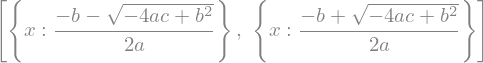

In [22]:
x = sp.Symbol('x')
a = sp.Symbol('a')
b = sp.Symbol('b')
c = sp.Symbol('c')

expr = a*x*x + b*x + c
sp.solve(expr, x, dict=True)

In this example, we must include an additional argument, `x`, to the `solve()` function. Because there's more than one symbol in the equation, we need to inform `solve()` which symbol it should solve for, which we indicate by passing in `x` as the second argument. As anticipated, `solve()` outputs the quadratic formula: the general formula for determining the value(s) of `x` in a polynomial expression.

### Solving a system of linear equations

Consider the following two equations:

$$
\begin{align}
2x + 3y &= 6 \\
3x + 2y &= 12
\end{align}
$$

Suppose we want to find the pair of values `(x, y)` that satisfies both equations. We can use the `solve()` function to find the solution for a system of equations like this one. First, we define the two symbols and construct the two equations:

In [ ]:
x = sp.Symbol('x')
y = sp.Symbol('y')
expr1 = 2*x + 3*y - 6
expr2 = 3*x + 2*y - 12

sp.solve((expr1, expr2), dict=True)

[{x: 24/5, y: -6/5}]

Observe how we've rearranged the expressions so that they both equal zero. Retrieving the solution as a dictionary is beneficial in this scenario because we can verify whether the solution we obtained indeed satisfies the equations:

In [ ]:
sol = sp.solve((expr1, expr2), dict=True)
expr1.subs({x:sol[0][x], y:sol[0][y]}), expr2.subs({x:sol[0][x], y:sol[0][y]})

(0, 0)

The output of substituting the values of `x` and `y` corresponding to the solution in the two expressions is zero, which confirms that the solution satisfies both equations.

If we're unable to obtain the exact solution, we can still obtain the numerical solution using the `nroots()` function:

In [ ]:
expr1 = x**3 + 2*x**2 -1
sp.solve(expr1), sp.nroots(expr1, n=3) # n is the number of digits to calculate

⎛⎡      1   √5    √5   1⎤                      ⎞
⎜⎢-1, - ─ + ──, - ── - ─⎥, [-1.62, -1.0, 0.618]⎟
⎝⎣      2   2     2    2⎦                      ⎠

## Plotting using `SymPy`

With `SymPy`, you can simply provide the equation of the line you wish to plot, and `SymPy` will create the graph for you. Let's plot a line whose equation is given by $y = 2x + 3$:

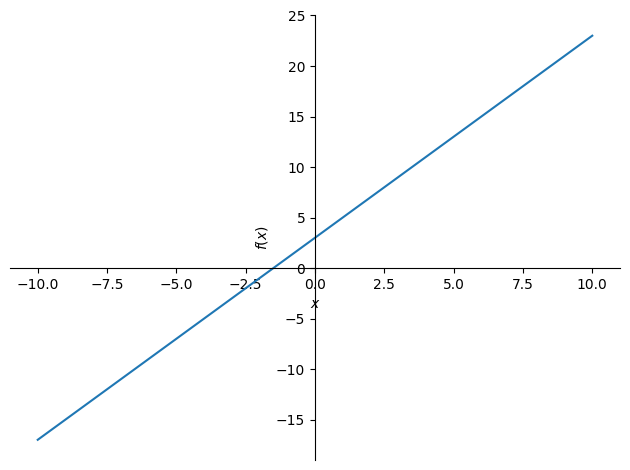

In [ ]:
x = sp.Symbol('x')
sp.plot(2*x+3);

> The graph reveals that a default range of `x` values was automatically selected: −10 to 10. In reality, `SymPy` employs `matplotlib` in the background to generate the graphs.

Suppose you wanted to constrain the values of `x` in the previous graph to lie within the range of −5 to 5. Additionally, we can use other keyword arguments in the `plot()` function, such as `title` to specify a title or `xlabel` and `ylabel` to label the x-axis and the y-axis, respectively. Here's how to accomplish this:

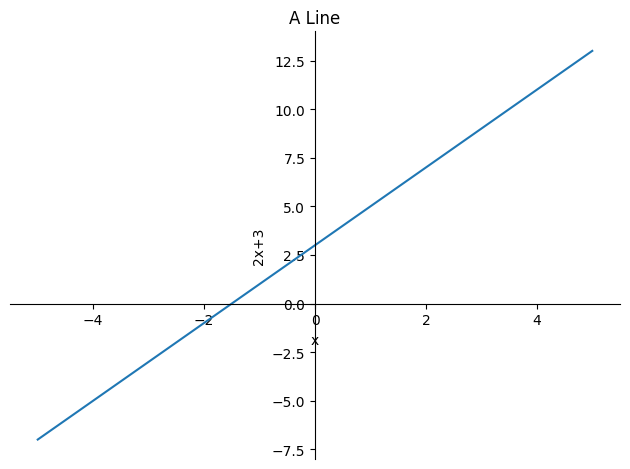

In [ ]:
sp.plot(2*x + 3, (x, -5, 5), title='A Line', xlabel='x', ylabel='2x+3');

You can plot more than one expression on the same graph by providing multiple expressions when calling the `SymPy` `plot()` function. Here's the code:

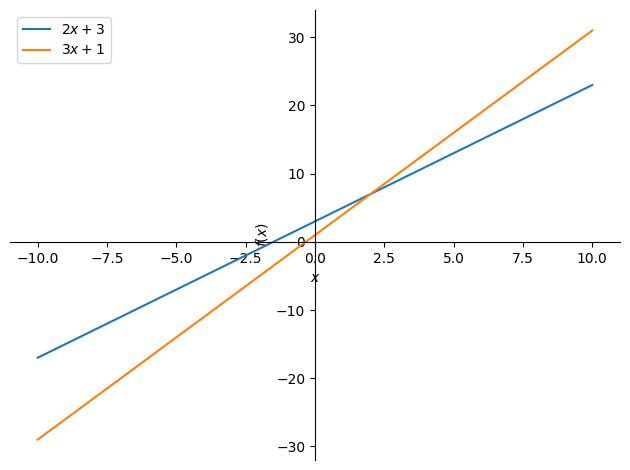

In [ ]:
x = sp.Symbol('x')
p = sp.plot(2*x+3, 3*x+1, legend=True)
p[0].line_color = 'b'
p[1].line_color = 'r'

We use the `plot()` function with the equations for the two lines but also pass two additional keyword arguments — `legend`. By setting the `legend` argument to `True`, we add a legend to the graph. `p[0]` refers to the first line, $2x + 3$, and we set its `line_color` attribute to `'b'`, indicating that we want this line to be blue. Similarly, we set the color of the second plot to red using the string `'r'`. 

## Calculus with `SymPy`

To find limits of functions in `SymPy`, we can create objects of the `Limit` class as follows:

In [ ]:
x = sp.Symbol('x')
l = sp.Limit(1/x, x, sp.oo) # (function, variable, limit)
l

    1
lim ─
x─→∞x

The result is returned as an unevaluated object. To obtain the value of the limit, we can use the `doit()` method:

In [ ]:
l.doit()

0

By default, the limit is calculated from a positive direction unless the value at which the limit is to be computed is positive or negative infinity. If the limit is at positive infinity, the direction is negative, and if it is at negative infinity, the direction is positive. We can change the default direction as follows:

In [ ]:
sp.Limit(1/x, x, 0, dir='-').doit()

-∞

We can change the default direction of limit calculation using the `dir` argument. The symbol `dir='-'` specifies that we are approaching the limit from the negative side. Alternatively, instead of using the `Limit` class, we can use the `limit()` function to find the limit of a function directly:

In [ ]:
sp.limit(sp.sin(x)/x, x, 0), sp.limit((1+1/x)**x, x, sp.oo)

(1, ℯ)

### Finding the derivative of functions

To find the derivative of a function, we can create an object of `Derivative` class:

In [ ]:
t = sp.Symbol('t')
St = 5*t**2 + 2*t + 8
sp.Derivative(St, t)

d ⎛   2          ⎞
──⎝5⋅t  + 2⋅t + 8⎠
dt                

Similar to the `Limit` class, when we create an object of `Derivative` class, it doesn't calculate the derivative right away. Instead, we need to call the `doit()` method on the unevaluated `Derivative` object to evaluate and obtain the derivative:

In [ ]:
d = sp.Derivative(St, t)
d.doit()

10⋅t + 2

If we want to calculate the value of the derivative at a specific value of $t$ such as $t = t_1$ or $t = 1$, we can use our `subs()` method:

In [ ]:
t1 = sp.Symbol('t1')
d.doit().subs({t:t1}), d.doit().subs({t:1})

(10⋅t₁ + 2, 12)

Similarly, we can also use the `diff()` function to find the derivative of a function directly:

In [ ]:
sp.diff(St, t)

10⋅t + 2

To calculate higher derivatives, we can provide the third argument to specify the order:

In [ ]:
sp.diff(St, t, 2)

10

### Finding the integrals of functions

We can determine either the indefinite integral (antiderivative) or the definite integral by generating an `Integral` object:

In [3]:
x = sp.Symbol('x')
sp.Integral(sp.sin(x), x)

Integral(sin(x), x)

Just as with the `Limit` and `Derivative` classes, we can evaluate the integral by employing the `doit()` method:

In [4]:
sp.Integral(sp.sin(x), x).doit()

-cos(x)

Additionally, the `integrate()` function can be utilized to directly compute the integral of a given function:

In [5]:
sp.integrate(sp.sin(x), x), sp.integrate(sp.log(x), x)

(-cos(x), x*log(x) - x)

It's important to note that we should use the elementary math functions `sin()` and `log()` from the `SymPy` library in the above expression, rather than from alternative libraries such as `NumPy`.

To calculate the definite integral, we just need to provide the variable, the lower limit, and the upper limit as a `tuple`:

In [6]:
# sp.Integral(sp.sin(x), (x, 0, sp.pi / 2)).doit()
sp.integrate(sp.sin(x), (x, 0, sp.pi / 2))

1

Improper integrals are supported as well:

In [7]:
sp.integrate(sp.exp(-x), (x, 0, sp.oo))

1

### Series expansion

`SymPy` is also capable of calculating the Taylor series of an expression at a specific point. Utilize `series(expr, x, x0, n)` to determine the series expansion of `expr` around the point `x = x0` up to `O(x^n)` (where `n` is an integer):

In [8]:
sp.series(sp.cos(x), x, 0, 10)

1 - x**2/2 + x**4/24 - x**6/720 + x**8/40320 + O(x**10)

Additionally, we can eliminate the `O(x^n)` term by applying the `removeO()` method:

In [9]:
sp.series(sp.sin(x), x, 0, 10).removeO()

x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x

### `lambdafy()`

The `lambdify()` function translates `SymPy` expressions into Python functions so that they can be evaluated numerically.

In [11]:
expr = sp.series(sp.cos(x), x, 0, 10).removeO()
f = sp.utilities.lambdify(x, expr, 'numpy')
f(0)

1.0

## Linear algebra with `SymPy`

Matrices can be generated as instances of the `Matrix` class:

In [ ]:
a, b, c, x, y, z = sp.symbols('a, b, c, x, y, z')

When creating a matrix in `SymPy`, the syntax resembles that of `NumPy`: you supply a list of lists, with each list representing a row in the matrix:

In [ ]:
m1 = sp.Matrix([[a,b,c], [x, y, z], [a, b, c]])
m1

⎡a  b  c⎤
⎢       ⎥
⎢x  y  z⎥
⎢       ⎥
⎣a  b  c⎦

A matrix with `a, b, c` as diagonal elements can be constructed utilizing the `diag()` function:

In [ ]:
m2 = sp.diag(a,b,c)
m2

⎡a  0  0⎤
⎢       ⎥
⎢0  b  0⎥
⎢       ⎥
⎣0  0  c⎦

Matrix multiplication can then be performed using the `*` operator:

In [ ]:
m1*m2.T

⎡ 2    2    2 ⎤
⎢a    b    c  ⎥
⎢             ⎥
⎢a⋅x  b⋅y  c⋅z⎥
⎢             ⎥
⎢ 2    2    2 ⎥
⎣a    b    c  ⎦

Scalar multiplication and addition function as anticipated:

In [ ]:
3*m1 + m2

⎡4⋅a    3⋅b    3⋅c⎤
⎢                 ⎥
⎢3⋅x  b + 3⋅y  3⋅z⎥
⎢                 ⎥
⎣3⋅a    3⋅b    4⋅c⎦

The inverse of the matrix can be acquired using the `inv()` method:

In [ ]:
m2.inv()

⎡1      ⎤
⎢─  0  0⎥
⎢a      ⎥
⎢       ⎥
⎢   1   ⎥
⎢0  ─  0⎥
⎢   b   ⎥
⎢       ⎥
⎢      1⎥
⎢0  0  ─⎥
⎣      c⎦

The matrix's eigenvalues and eigenvectors can be derived using the `eigenvals()` and `eigenvects()` methods:

In [ ]:
m2.eigenvals(), m2.eigenvects()

⎛                    ⎡⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡0⎤⎤⎞  ⎛      ⎡⎡0⎤⎤⎞⎤⎞
⎜                    ⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥⎟
⎜{a: 1, b: 1, c: 1}, ⎢⎜a, 1, ⎢⎢0⎥⎥⎟, ⎜b, 1, ⎢⎢1⎥⎥⎟, ⎜c, 1, ⎢⎢0⎥⎥⎟⎥⎟
⎜                    ⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥⎟
⎝                    ⎣⎝      ⎣⎣0⎦⎦⎠  ⎝      ⎣⎣0⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦⎠

All in all, `SymPy` is a Python library for symbolic mathematics. It aims to provide a computer algebra system that is both easy to use and extensible. Unlike numerical libraries, which focus on approximations and numerical computations, `SymPy` is designed to perform algebraic manipulations and simplifications symbolically, allowing for exact solutions to mathematical problems.

`SymPy` offers a wide range of features, including basic arithmetic operations, algebraic manipulation, calculus, equation solving, linear algebra, and more. It is particularly well-suited for tasks that require manipulation of symbolic expressions or solving equations symbolically.